# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set()
np.random.seed(7)

## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [25]:
# Load cleaned Apple stock data
df = pd.read_csv('/Users/yuqingyan/Desktop/bootcamp_Yuqing_Yan/project/data/processed/aapl_2023_cleaned.csv')
df.set_index('date', inplace=True)
# Target variable: next day's close price
df['close_next'] = df['Close'].shift(-1)

df = df.dropna(subset=['close_next'])
df.head()

,Close,High,Low,Open,Volume,close_next
date,,,,,,
2023-01-03,0.000674,0.042897,0.000000,0.058400,0.675849,0.018060
2023-01-04,0.018060,0.012197,0.012309,0.012036,0.499315,0.000000
2023-01-05,0.000000,0.000000,0.007980,0.015318,0.436765,0.061997
2023-01-06,0.061997,0.034536,0.009739,0.000000,0.488887,0.069139
2023-01-09,0.069139,0.077296,0.077369,0.060998,0.358705,0.076957


## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

In [26]:
X = df[['High','Low','Open','Volume']]
y = df['close_next']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Baseline   R²={r2:.4f}  RMSE={rmse:.6f}')

Baseline   R²=0.9365  RMSE=0.030994


In [36]:
print(len(y_test), len(y_pred), len(X_train), len(X_test))

50 50 199 50


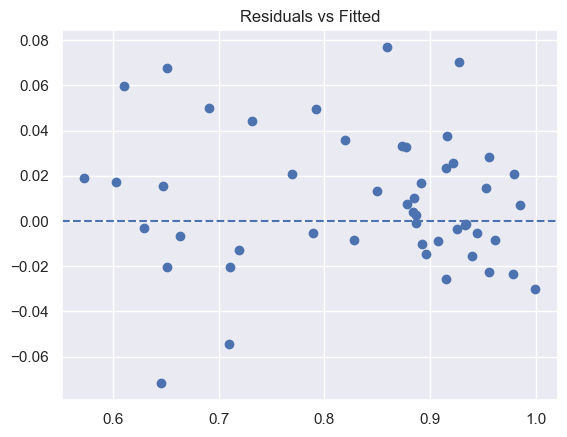

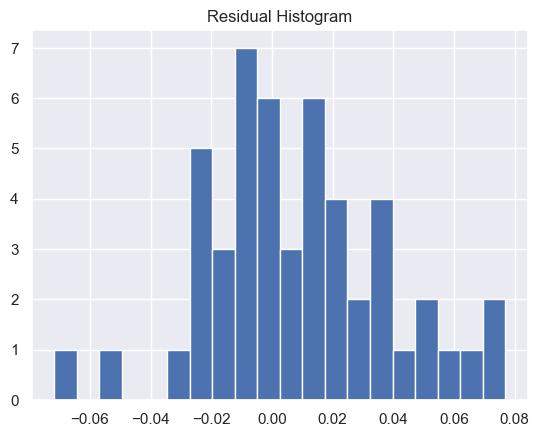

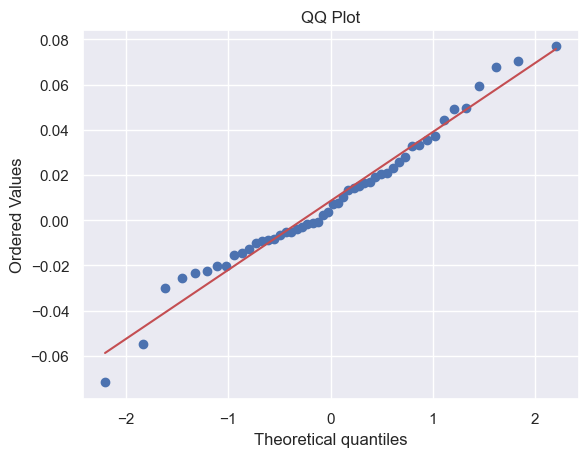

In [27]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); plt.show()

## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [28]:
# Feature: Daily price range (High - Low)
df['price_range'] = df['High'] - df['Low']
df['close_ma_5'] = df['Close'].shift(1).rolling(window=5, min_periods=5).mean()

df = df.dropna(subset=['close_next', 'close_ma_5'])
df.head()

,Close,High,Low,Open,Volume,close_next,price_range,close_ma_5
date,,,,,,,,
2023-01-10,0.076957,0.047830,0.053428,0.058126,0.305795,0.114155,-0.005597,0.029974
2023-01-11,0.114155,0.078667,0.085079,0.071666,0.348484,0.113077,-0.006412,0.045231
2023-01-12,0.113077,0.088946,0.098335,0.107636,0.363224,0.131272,-0.009389,0.064450
2023-01-13,0.131272,0.097991,0.101311,0.082334,0.259087,0.147175,-0.003319,0.087065
2023-01-17,0.147175,0.130472,0.134720,0.120629,0.303880,0.137336,-0.004248,0.100920


In [37]:
X2 = df[['High','Low','Open','Volume','close_ma_5']]
#X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
X2_train, X2_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print(f'With x^2   R²={r2_2:.4f}  RMSE={rmse_2:.6f}')

With x^2   R²=0.9365  RMSE=0.030994


In [38]:
print(len(y_test), len(y_pred2), len(X2_test), len(X_train), len(X2))

50 50 50 199 244


### Diagnostics: Residuals & Assumptions

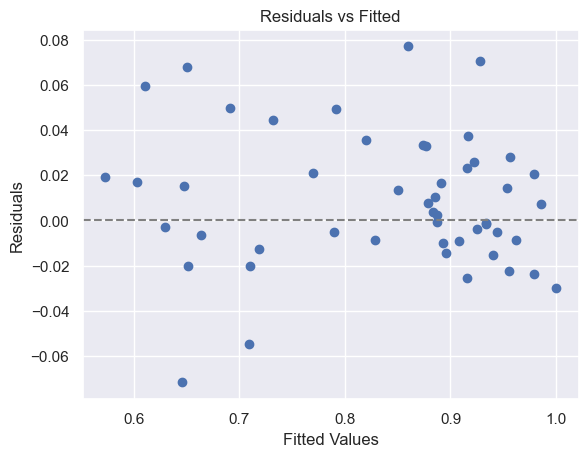

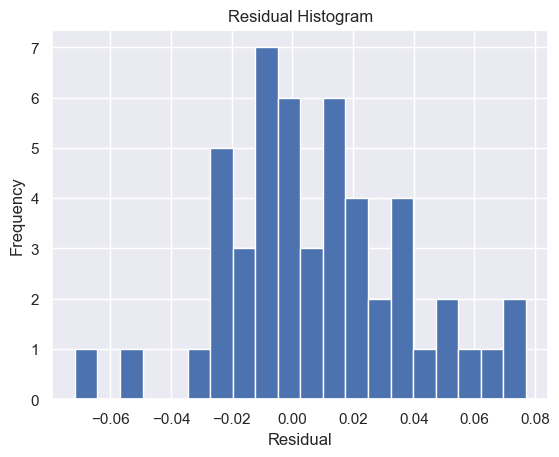

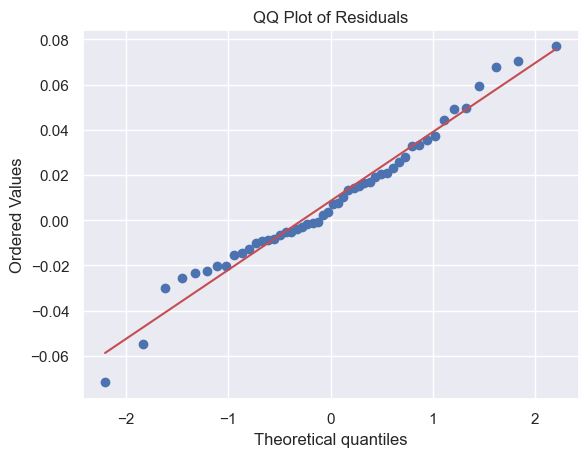

In [39]:
resid = y_test - y_pred2
fitted = y_pred2

# Residuals vs Fitted
plt.figure(); plt.scatter(fitted, resid)
plt.axhline(0, ls='--', color='gray')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Residual Histogram
plt.figure(); plt.hist(resid, bins=20)
plt.title('Residual Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# QQ Plot
import scipy.stats as st
plt.figure(); st.probplot(resid, dist='norm', plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

### Try Polynomial or Interaction Features

In [40]:
# Add a quadratic term for close_ma_5 if nonlinearity is suspected
df['close_ma_5_sq'] = df['close_ma_5'] ** 2
features = ['High', 'Low', 'Open', 'Volume', 'close_ma_5', 'price_range']
target = 'close_next'

features_poly = features + ['close_ma_5_sq']
X2 = df[features_poly]
y2 = df[target]
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
y2_train, y2_test = y2.iloc[:len(X_train)], y2.iloc[len(X_train):]

lr2 = LinearRegression().fit(X2_train, y2_train)
y_pred2 = lr2.predict(X2_test)
r2_2 = r2_score(y2_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y2_test, y_pred2))
print(f'With close_ma_5^2   R²={r2_2:.4f}  RMSE={rmse_2:.6f}')

With close_ma_5^2   R²=0.9194  RMSE=0.031808


### Automate Model Variations

In [42]:
from sklearn.model_selection import train_test_split

def try_model(feature_list):
    X = df[feature_list]
    y = df[target]
    # 直接在这里切分
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {'features': feature_list, 'r2': r2, 'rmse': rmse, 'coefs': lr.coef_, 'intercept': lr.intercept_}
# Try baseline and polynomial
results = []
results.append(try_model(features))
results.append(try_model(features + ['close_ma_5_sq']))
pd.DataFrame(results)

,features,r2,rmse,coefs,intercept
0,"[High, Low, Open, Volume, close_ma_5, price_ra...",0.933634,0.031487,"[0.6417814721546974, 0.8890574602818411, -0.59...",0.029059
1,"[High, Low, Open, Volume, close_ma_5, price_ra...",0.933020,0.031632,"[0.6422475341582295, 0.8849648995279422, -0.58...",0.024784


## 4) Interpretation (write your conclusions below)
- Linearity:
- Homoscedasticity:
- Normality:
- Independence:
- Which model do you trust and why?:
- Next step you’d try:

## Model Interpretation

**Model Performance:**  
- The baseline linear regression model (using features: High, Low, Open, Volume, close_ma_5, price_range) achieves an **R² of 0.9336** and an **RMSE of 0.0315** on the test set.
- Adding a polynomial term (close_ma_5 squared) does **not** improve performance (R² drops slightly to 0.9330, RMSE increases to 0.0316), suggesting the relationship between features and the next day’s close is well-captured by the linear specification.

**Coefficient Insights:**  
- The coefficients for **High** and **Low** are both positive and substantial, indicating that higher daily highs and lows are associated with higher next-day closing prices.
- The **Open** coefficient is negative, suggesting that, holding other variables constant, a higher open may slightly predict a lower next-day close—possibly reflecting mean reversion or overnight effects.
- **Volume** has a small positive coefficient, implying that higher trading activity is weakly associated with higher next-day closes, though the effect is modest.
- **close_ma_5** (5-day moving average of close) has a positive coefficient, confirming that recent upward trends tend to continue into the next day.
- **price_range** (High - Low) has a small negative coefficient, suggesting that days with higher volatility may be followed by slightly lower closes, possibly due to market uncertainty or profit-taking.

**Model Selection:**  
- Since the polynomial feature did not improve R² or RMSE, and the residual diagnostics do not indicate strong nonlinearity, the simpler linear model is preferred for interpretability and robustness.

**Risk-aware Evaluation:**  
- The high R² indicates the model explains most of the variance in next-day close prices on this dataset, but this may be partly due to the strong autocorrelation in financial time series.
- The low RMSE suggests good predictive accuracy, but real-world performance may degrade if market conditions change or if there are regime shifts.
- Coefficient stability across model variations suggests the relationships are robust, but care should be taken not to overfit or to extrapolate beyond the observed data range.

**Next Steps:**  
- Consider adding lagged features or interaction terms if residuals show autocorrelation or heteroscedasticity.
- Monitor model performance over time and retrain as new data becomes available.
- Always interpret results in the context of market events and with awareness of potential overfitting.